### Retrieving Metadata about a the book "Die Märchen Der Gebrüder Grimm"

We will beusing [The Internet Archive Python Library](https://archive.org/developers/internetarchive/index.html) to get the text data of the book [Die Märchen Der Gebrüder Grimm](https://archive.org/details/die-marchen-der-gebruder-grimm-kinder-und-hausmarchen-141-mbytes-20200716/mode/2up)

In particular, we need the [text format of that book](https://archive.org/stream/die-marchen-der-gebruder-grimm-kinder-und-hausmarchen-141-mbytes-20200716/Die%20M%C3%A4rchen%20der%20Gebr%C3%BCder%20Grimm_Kinder-%20und%20Hausm%C3%A4rchen_141%20MBytes_20200716_djvu.txt) which can be downloaded using the [`download`](https://archive.org/developers/internetarchive/quickstart.html#downloading) of the library. We need to provide

1. the identifier of the book, and
2. the format of the downloadable, i.e. text format

The identifier of that book can be found on the [book page](https://archive.org/details/die-marchen-der-gebruder-grimm-kinder-und-hausmarchen-141-mbytes-20200716/mode/2up) by looking at a field called "__Identifier__". In our case, the identifier is ` die-marchen-der-gebruder-grimm-kinder-und-hausmarchen-141-mbytes-20200716`

The format has a value that must be obtained by looking at the metadata of that book. Let's retrieve it first:

In [1]:
import json
from internetarchive import get_item

BOOK_IDENTIFIER="die-marchen-der-gebruder-grimm-kinder-und-hausmarchen-141-mbytes-20200716"

item = get_item(BOOK_IDENTIFIER)
print(json.dumps(item.item_metadata, indent=4))

{
    "created": 1722929206,
    "d1": "ia903208.us.archive.org",
    "d2": "ia803208.us.archive.org",
    "dir": "/22/items/die-marchen-der-gebruder-grimm-kinder-und-hausmarchen-141-mbytes-20200716",
    "files": [
        {
            "name": "Die M\u00e4rchen der Gebr\u00fcder Grimm_Kinder- und Hausm\u00e4rchen_141 MBytes_20200716.epub",
            "source": "derivative",
            "original": "Die M\u00e4rchen der Gebr\u00fcder Grimm_Kinder- und Hausm\u00e4rchen_141 MBytes_20200716_abbyy.gz",
            "mtime": "1699549449",
            "size": "2965462",
            "md5": "0e71e73d5b3ca5df4600d2c2b2c67028",
            "crc32": "e9c10c67",
            "sha1": "9f40b6573ed89e778875bc3f3f1320e2639235db",
            "format": "EPUB"
        },
        {
            "name": "Die M\u00e4rchen der Gebr\u00fcder Grimm_Kinder- und Hausm\u00e4rchen_141 MBytes_20200716.pdf",
            "source": "original",
            "mtime": "1594875306",
            "size": "148426700",
       

### Downlading the book

We see that the format is is "__DjVuTXT__". So lets download our book now:

In [2]:
BOOK_IDENTIFIER="die-marchen-der-gebruder-grimm-kinder-und-hausmarchen-141-mbytes-20200716"

from internetarchive import download
download(BOOK_IDENTIFIER, verbose=True, formats="DjVuTXT")

die-marchen-der-gebruder-grimm-kinder-und-hausmarchen-141-mbytes-20200716:
 skipping die-marchen-der-gebruder-grimm-kinder-und-hausmarchen-141-mbytes-20200716/Die Märchen der Gebrüder Grimm_Kinder- und Hausmärchen_141 MBytes_20200716_djvu.txt, file already exists based on length and date.


[]

### Viwsualizing Word Frequency using Word Cloud

We will use [word_cloud](https://github.com/amueller/word_cloud) to get a sense of what the most frequently used words in the context of storytelling:

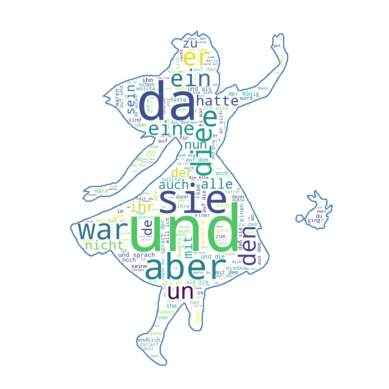

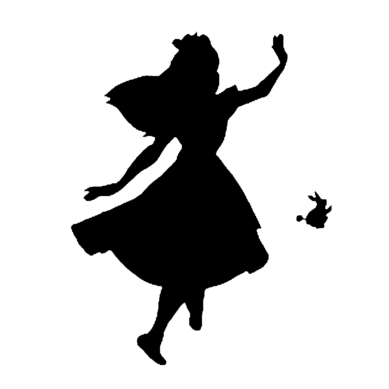

In [5]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'die-marchen-der-gebruder-grimm-kinder-und-hausmarchen-141-mbytes-20200716/Die Märchen der Gebrüder Grimm_Kinder- und Hausmärchen_141 MBytes_20200716_djvu.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "img/alice_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()